In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")

In [11]:
df.columns

Index([u'player', u'position', u'age', u'team', u'games', u'games started',
       u'minutes player', u'field goals per game',
       u'field goal attempts per game', u'field goal percentage',
       u'3-point field goals per game',
       u'3-point field goal attempted per game', u'3-point goal percentage',
       u'2-point field goals per game',
       u'2-point field goals attempted per game',
       u'2-point field goal percentage', u'effective field goal percentage',
       u'free throws per game', u'free throw attempts per game',
       u'free throw percentage', u'offensive rebounds per game',
       u'defensive rebounds per game', u'total rebounds per game',
       u'assists per game', u'steals per game', u'blocks per game',
       u'turnovers per game', u'personal fouls per game', u'points per game',
       u'3 point attempt rate', u'assist percentage', u'block percentage',
       u'box plus minus', u'defensive box plus minux',
       u'defensive rebound percentage', u'defensiv

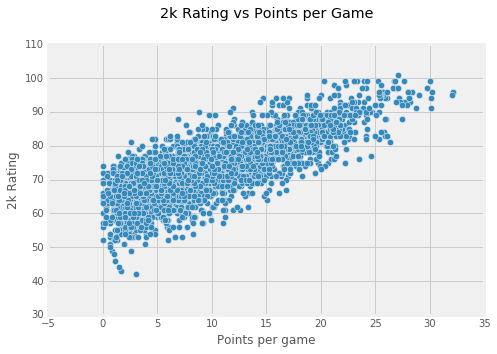

In [22]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("fivethirtyeight")

%matplotlib inline

ax = df.plot.scatter(x="points per game", y="rating", figsize=(7,5), s=40)
ax.set_title("2k Rating vs Points per Game", y=1.08)
ax.set_ylabel("2k Rating")
ax.set_xlabel("Points per game")
fig = ax.get_figure()
plt.tight_layout()
fig.savefig("ratings_vs_ppg.png", dpi=200)

In [33]:
df = df.fillna(0)

In [52]:
games_started_df = df.groupby('games started').mean()
games_started = list(games_started_df.index)
ratings = list(games_started_df['rating'])

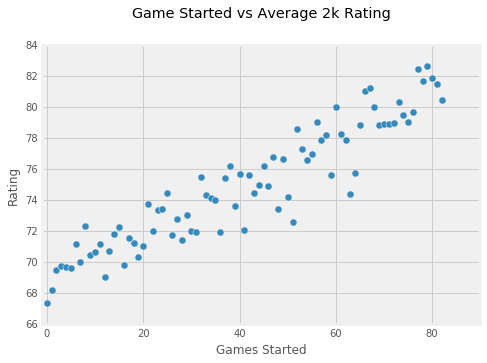

In [65]:
game_started_vs_rating = pd.DataFrame({
    "Games Started": games_started,
    "Rating": ratings
})

ax = game_started_vs_rating.plot.scatter(x="Games Started", y="Rating", s=50, figsize=(7,5))
ax.set_title("Game Started vs Average 2k Rating", y=1.08)
ax.set_xlim(-1,90)
fig = ax.get_figure()
fig.savefig("games_started_vs_avg_2k_rating.png", dpi=200)

In [67]:
df.columns = ["_".join(col.split(" ")) for col in df.columns]

In [132]:
df.groupby('position_PG').mean()

,age,games,games_started,minutes_player,field_goals_per_game,field_goal_attempts_per_game,field_goal_percentage,3-point_field_goals_per_game,3-point_field_goal_attempted_per_game,3-point_goal_percentage,...,true_shooting_percentage,usage_percentage,value_over_replacement_player,win_shares,win_shares_per_48_minutes,rating,position_C,position_PF,position_SF,position_SG
position_PG,,,,,,,,,,,,,,,,,,,,,
0.0,26.446039,55.797567,29.520586,22.419869,3.443824,7.561323,0.448909,0.562321,1.584311,0.232477,...,0.520128,18.756893,0.820399,3.134654,0.088451,72.795072,0.242982,0.25078,0.245789,0.260449
1.0,26.437984,56.534884,31.779070,24.306202,3.613437,8.509561,0.413107,0.882041,2.506202,0.321605,...,0.506616,20.389276,0.864212,3.139793,0.077375,74.426357,0.000000,0.00000,0.000000,0.000000


In [70]:
from sklearn import preprocessing 

In [80]:
df = df.drop("player", axis=1)
df = df.drop("team", axis=1)

In [88]:
df = df_new

In [94]:
df_columns = df.columns

In [111]:
X_features = df.ix[:, df.columns != 'rating']

In [115]:
X_data = X_features.as_matrix()

In [117]:
y_labels = df['rating']

In [118]:
y_data = y_labels.as_matrix()

In [119]:
print X_data.shape

(3980, 51)


In [120]:
print y_data.shape

(3980,)


In [122]:
import numpy as np
np.save("features.npy", X_data)
np.save("labels.npy", y_data)

,age,games,games_started,minutes_player,field_goals_per_game,field_goal_attempts_per_game,field_goal_percentage,3-point_field_goals_per_game,3-point_field_goal_attempted_per_game,3-point_goal_percentage,...,usage_percentage,value_over_replacement_player,win_shares,win_shares_per_48_minutes,rating,position_C,position_PF,position_PG,position_SF,position_SG
0,27,4,0,6.0,0.0,0.5,0.000,0.0,0.0,0.000,...,10.2,0.0,-0.1,-0.128,65,0.0,0.0,0.0,0.0,1.0
1,24,56,28,23.7,4.0,8.5,0.470,0.1,0.3,0.278,...,20.4,0.0,2.2,0.080,74,0.0,0.0,0.0,0.0,1.0
2,26,69,67,36.6,7.7,16.6,0.462,3.3,7.7,0.434,...,26.2,4.0,8.9,0.169,93,0.0,0.0,0.0,0.0,1.0
3,25,50,7,12.0,1.3,3.8,0.346,0.5,1.4,0.380,...,19.0,-0.2,0.7,0.059,64,0.0,0.0,1.0,0.0,0.0
4,27,70,27,26.6,3.5,8.7,0.404,1.2,3.3,0.373,...,19.4,1.3,5.3,0.137,77,0.0,0.0,0.0,0.0,1.0
5,28,82,6,19.5,1.8,4.5,0.399,0.5,1.7,0.277,...,15.1,-0.3,0.4,0.013,70,0.0,0.0,0.0,0.0,1.0
6,20,47,30,24.6,3.7,8.2,0.453,0.8,2.4,0.345,...,20.1,0.9,2.7,0.114,82,0.0,0.0,1.0,0.0,0.0
7,21,35,0,5.6,0.8,2.4,0.318,0.1,0.5,0.294,...,22.3,-0.3,-0.2,-0.054,61,0.0,0.0,0.0,0.0,1.0
8,33,82,79,33.3,4.2,10.1,0.419,1.7,4.9,0.349,...,17.9,3.4,7.6,0.134,78,0.0,0.0,1.0,0.0,0.0
9,30,55,41,31.1,5.7,11.8,0.485,0.0,0.1,0.125,...,23.8,-0.4,2.2,0.061,71,1.0,0.0,0.0,0.0,0.0
